<a href="https://colab.research.google.com/github/sarahgottardi/prova_ds/blob/main/Data_Science_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teste Cientista de Dados

Instruções básicas: Utilize um ambiente de desenvolvimento Jupyter com kernel Python 3+. Para solucionar os desafios, utilize de quaisquer bibliotecas que julgar necessário, a menos que o enunciado especifique o contrário. Fique a vontade para utilizar um ambiente de desenvolvimento local ou remoto (exemplo: Google Colab). A entrega deve ser o próprio arquivo de notebook, no seguinte padrão: nomesobrenome.ipynb

1 - Utilize o dataset existente em https://www.kaggle.com/fedesoriano/stroke-prediction-dataset como base para realizar a prova. 


In [1]:
# libs
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv
import pandas as pd
import io
import requests
import zipfile
import seaborn as sns

In [2]:
import numpy as np

In [3]:
# lendo dados pela url ou em arquivo local
link = "https://github.com/sarahgottardi/prova_ds/blob/main/dados/healthcare-dataset-stroke-data.csv"
url = "https://github.com/sarahgottardi/prova_ds/blob/3154f28319f8766077c07978f54a67c005faa49f/dados/healthcare-dataset-stroke-data.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')), encoding = 'utf8', skiprows = 10, sep = '|')
c.head(2) 

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2 - Realize uma análise exploratória, utilizando de gráficos e análises estatísticas, para indicar o comportamento dos dados, inclusive dados faltantes. Assuma o completo desconhecimento da base de dados e procure quaisquer pontos relevantes para uma futura etapa de modelagem.
Não se limite nessa análises, nos mostre o que você considera importante em uma análise exploratória.


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
continuas = ['age', 'avg_glucose_level', 'bmi']
categorias = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status', 'stroke']
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
for coluna in categorias:
  print(df[coluna].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


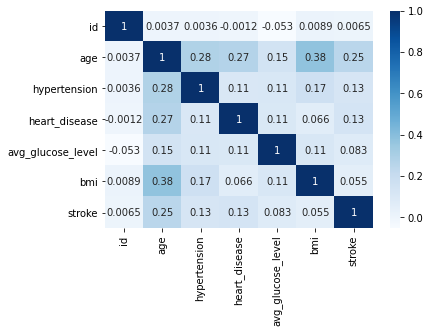

In [10]:
sns.heatmap(df.corr('spearman'), annot =True, cmap='Blues')

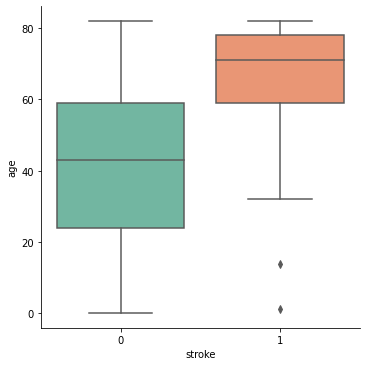

In [11]:
sns.catplot(x = 'stroke', y = 'age', kind='box', palette = 'Set2', data = df )

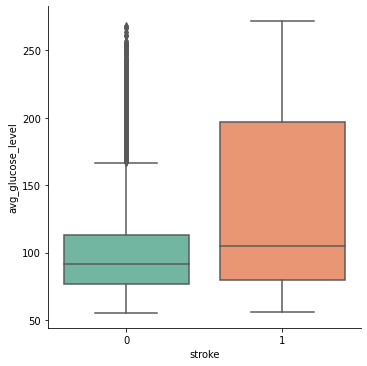

In [12]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', kind='box', palette = 'Set2', data = df )


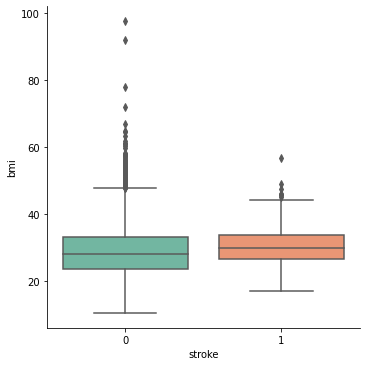

In [13]:
sns.catplot(x = 'stroke', y = 'bmi', kind='box', palette = 'Set2', data = df )

3 - Realise as etapas de pré-processamento e separação dos dados que julgar adequadas para o treinamento de um modelo de classificação binária sobre a variável alvo, utilizando todas as demais colunas do DataFrame como variáveis do modelo. 

In [15]:
# tratando nulos
when = [df.bmi.isnull(),
        df.bmi.notnull(),]
then = [-1, df.bmi]
df['bmi_2'] =   np.select(when,then, default=25)       

In [16]:
# categorizando 
when = [df.ever_married.isin(['Yes']),
        df.ever_married.isin(['No']),]
then = [1, 0]
df['ever_married_2'] =   np.select(when,then)  

# categorizando 
when = [df.gender.isin(['Female']),
        df.gender.isin(['Male']),]
then = [0, 1]
df['gender_2'] =   np.select(when,then)  

# categorizando 
when = [df.work_type.isin(['Private']),
        df.work_type.isin(['children']),
        df.work_type.isin(['Govt_job']),
        df.work_type.isin(['Never_worked']),

        ]
then = [4, 3, 2, 1]
df['work_type_2'] =   np.select(when,then)  


# categorizando 
when = [df.smoking_status.isin(['never smoked']),
        df.smoking_status.isin(['Unknown']),
        df.smoking_status.isin(['formerly smoked']),
        df.smoking_status.isin(['smokes ']),

        ]
then = [1, 2, 3, 4]
df['smoking_status_2'] =   np.select(when,then) 


In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_2,ever_married_2,gender_2,work_type_2,smoking_status_2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6,1,1,4,3
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,-1.0,1,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5,1,1,4,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4,1,0,4,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0,1,0,0,1


4 - Apresente um gráfico 2D de dispersão dos dados de teste em relação à variável alvo. Nesteprocedimento as colunas de variáveis devem ser transformadas apenas em duas, formando os eixos X
e Y do gráfico. Para amostras com valor de "TARGET" 0 utilizar a cor azul; já para amostras de"TARGET" 1 utilizar vermelho.

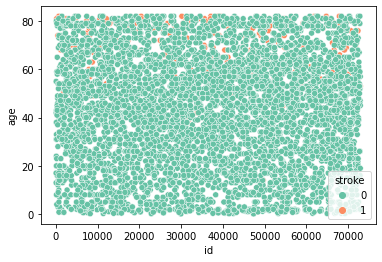

In [19]:
sns.scatterplot(x = 'id', y = 'age', hue='stroke', palette = 'Set2', data = df )

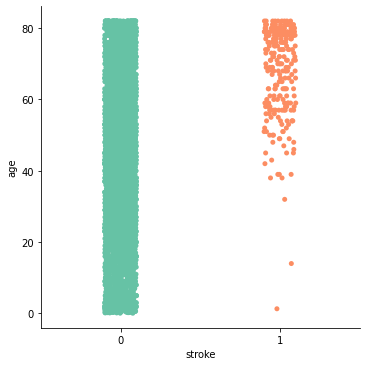

In [20]:
sns.catplot(x = 'stroke', y = 'age', hue='stroke', palette = 'Set2', data = df )

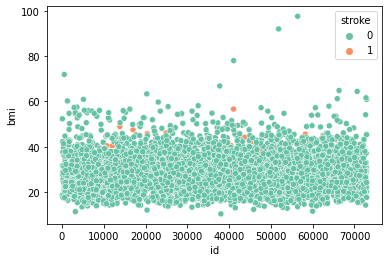

In [18]:
sns.scatterplot(x = 'id', y = 'bmi', hue='stroke', palette = 'Set2', data = df )

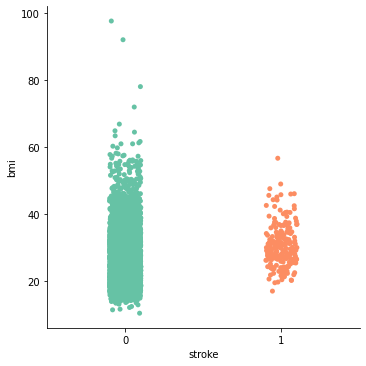

In [21]:
sns.catplot(x = 'stroke', y = 'bmi', hue='stroke', palette = 'Set2', data = df )


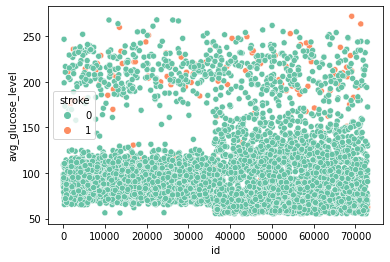

In [22]:
sns.scatterplot(x = 'id', y = 'avg_glucose_level', hue='stroke', palette = 'Set2', data = df )

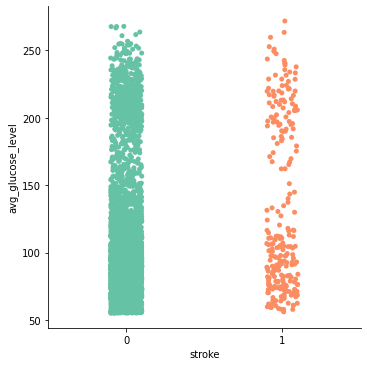

In [23]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', hue='stroke', palette = 'Set2', data = df )


5 - A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em árvore. Utilizeuma técnica de otimização de hiper-parametros a sua escolha.

In [26]:
df.columns 

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_2', 'ever_married_2', 'gender_2',
       'work_type_2', 'smoking_status_2'],
      dtype='object')

In [27]:
target = 'stroke'
features_selecionadas = ['age', 'avg_glucose_level', 'bmi_2', 'ever_married_2', 'gender_2',
       'work_type_2', 'smoking_status_2']

In [39]:
pip install scikit-optimize

     |████████████████████████████████| 101 kB 2.7 MB/s 


In [24]:
!pip install lightgbm


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats as stats
from lightgbm import LGBMClassifier
import skopt

In [78]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df[features_selecionadas], df[target], test_size = 0.2, random_state = 13)

In [63]:
nome_parametros = ['max_depth', 'num_leaves','learning_rate', 'n_estimators', 'min_spli_gain', 'min_data_in_leaf']
parametros = [(3,8), (5, 15), (0.02, 0.5), (50,200), (0.05,0.5), (30, 200)] 

In [104]:
modelo_2 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.5, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.05,
               n_estimators=50, n_jobs=-1, num_leaves=7, objective=None,
               random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

modelo_2.fit(x_treino[features_selecionadas], y_treino)

y_teste_pred = modelo_2.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.5, y_teste_pred < 0.5]
then = [1,0]
x_teste['y_m2'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_m2']))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.14      0.06      0.08        50

    accuracy                           0.94      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022



In [111]:
modelo_3 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.3, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.03,
               n_estimators=500, n_jobs=-1, num_leaves=7, objective=None,
               random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
modelo_3.fit(x_treino, y_treino)

y_teste_pred = modelo_3.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.6, y_teste_pred < 0.6]
then = [1,0]
x_teste['y_m3'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_m3']))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.15      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.52      1022
weighted avg       0.91      0.94      0.93      1022



In [113]:
modelo_1 = LGBMClassifier(random_state=17, importance_type='gain')
modelo_1.fit(x_treino, y_treino)

y_teste_pred = modelo_1.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.5, y_teste_pred < 0.5]
then = [1,0]
x_teste['y_m1'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_m1']))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.27      0.08      0.12        50

    accuracy                           0.94      1022
   macro avg       0.61      0.53      0.55      1022
weighted avg       0.92      0.94      0.93      1022



*Os modelos estão ruins, pois o recall do stroke=1 está baixíssimo, isso significa que a otimização automatizada seria útil, ou mesmo testar outros algoritmos ou balancear a amostra de forma ao modelo dar mais importancia ao padrão da minoria*



6 - A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em redes neurais.Utilize uma técnica de otimização de hiper-parametros ou busca automática de rede a sua escolha.

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0, class_weight=)
rf.fit(x_treino[features_selecionadas], y_treino)

y_teste_pred = rf.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.5, y_teste_pred < 0.5]
then = [1,0]
x_teste['y_rf'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_rf']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7 - A partir dos dados da etapa 3, treine um modelo utilizando qualquer técnica a sua escolha, desde queseja diferente das utilizadas nas questões 5 e 6.

8 - Compare os resultados dos tres modelos acima e justifique a métrica escolhida para avaliação

9 - Escolha um dos tres modelos acima. Supondo que um falso negativo tenha um custo muito maior doque falso positivo, e sabendo que a predição da variável alvo é realizada entre 0 e 1, mesmo em modelos de classificação binária, selecione um limiar para definir se uma pessoa terá ou não umderrame e justique a sua escolha.

10 - Realize uma análise de "Equal Error Rate" e uma análise "SHAP" para o modelo a cima e descrevasuas conclusões.

11 - Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função depredição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição(0 ou 1) utilizando o limiar definido na questão 9.

12 - Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, deforma que possa ser utilizado para realizar predições em tempo real

13 - Escreva uma função que receba uma lista (array) de numeros inteiros e retorne um booleano (True ouFalse) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca,somente a linguagem Python com seus tipos nativos.def isMonotonic(A: List[int]) -> bool:<seu código aqui>